# Import the libraries

In [ ]:
!pip install -q kaggle

In [ ]:
import os

os.environ['KAGGLE_USERNAME'] = "jagarapusiva" # username from the json file
os.environ['KAGGLE_KEY'] = "a48720e102d08571c95573944455ea0a" # key from the json file

In [ ]:
!kaggle datasets download -d vipoooool/new-plant-diseases-dataset

100% 2.69G/2.70G [00:36<00:00, 106MB/s] 
100% 2.70G/2.70G [00:36<00:00, 78.8MB/s]


In [ ]:
!pip install patool

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 77 kB 4.3 MB/s 


In [ ]:
import patoolib

In [ ]:
patoolib.extract_archive("/content/new-plant-diseases-dataset.zip")

patool: Extracting /content/new-plant-diseases-dataset.zip ...
patool: running /usr/bin/7z x -o./Unpack_5yvsk6ed -- /content/new-plant-diseases-dataset.zip
patool: ... /content/new-plant-diseases-dataset.zip extracted to `new-plant-diseases-dataset' (multiple files in root).


'new-plant-diseases-dataset'

In [ ]:
from tensorflow.keras.layers import Input,Lambda,Dense,Flatten
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

**Define the image size according to the standard set and Define the training path and testing path of the images**

In [ ]:
IMAGE_SIZE = [224, 224]
train_path = '/content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'
valid_path = '/content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid'

**Load the pre-trained model InceptionV3 and define the weights and input image size**

In [ ]:
inception=InceptionV3(input_shape=IMAGE_SIZE+[3],weights='imagenet',include_top=False)

87910968/87910968 [==============================] - 0s 0us/step


weights='imagenet' means that we will use pre-trained weights of the imagenet which was used to train the inceptionV3 model.

**No need to train the existing weights**

In [ ]:
for layers in inception.layers:
    layers.trainable=False

**flatten the output**

In [ ]:
# our layers - you can add more if you want
x=Flatten()(inception.output)

**Use glob to get total categories so that we can add it at the bottom of our network**

In [ ]:
# used to get number output classes
folders=glob('/content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/*')
folders

['/content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___Tomato_mosaic_virus',
 '/content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Blueberry___healthy',
 '/content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 '/content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Grape___Black_rot',
 '/content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Grape___Esca_(Black_Measles)',
 '/content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Strawberry___Leaf_scorch',
 '/content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases D

**Find the predictions and feed it to the model and Creating model object**

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)
model=Model(inputs=inception.input,outputs=prediction)

In [ ]:
# tell the model what cost and optimization method to use
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

**Use Image Data generator to import images from folder and for data augmentation**

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory('/content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train',
                                                 target_size = (224, 224),
                                                 batch_size = 128,
                                                 class_mode = 'categorical')

Found 70295 images belonging to 38 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
                                            target_size = (224, 224),
                                            batch_size =128,
                                            class_mode = 'categorical')

Found 17572 images belonging to 38 classes.


In [ ]:
r=model.fit(training_set, validation_data=test_set,epochs=5,steps_per_epoch=len(training_set),validation_steps=len(test_set))

Epoch 1/5
550/550 [==============================] - 849s 2s/step - loss: 2.0257 - accuracy: 0.7876 - val_loss: 1.6633 - val_accuracy: 0.8194
Epoch 2/5
550/550 [==============================] - 826s 2s/step - loss: 1.0811 - accuracy: 0.8804 - val_loss: 1.0872 - val_accuracy: 0.8890
Epoch 3/5
550/550 [==============================] - 815s 1s/step - loss: 1.1138 - accuracy: 0.8965 - val_loss: 1.1614 - val_accuracy: 0.8979
Epoch 4/5
550/550 [==============================] - 813s 1s/step - loss: 1.0187 - accuracy: 0.9108 - val_loss: 1.2565 - val_accuracy: 0.9096
Epoch 5/5
550/550 [==============================] - 810s 1s/step - loss: 0.9799 - accuracy: 0.9210 - val_loss: 1.3643 - val_accuracy: 0.9042


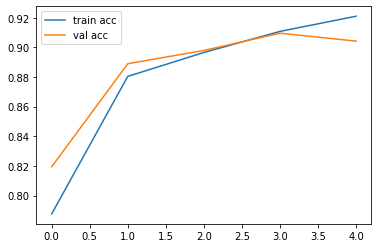

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the accuracy InceptionV3
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

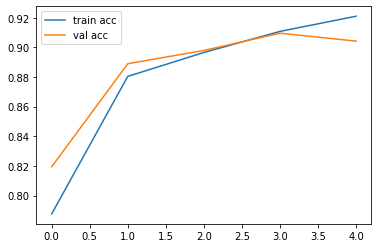

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the accuracy InceptionV3
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
from tensorflow.keras.models import load_model

model.save('disease.h5')

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
model_save_name = 'disease.h5'
path = F"/content/gdrive/My Drive/{model_save_name}" 
model.save(path)